```{questions}

   - How do we learn a new Python package?
   - How can I use pandas dataframes in my research?
```

```{objectives}

   - Learn the basics of pandas dataframes
   - Become confident in exploring new packages and libraries
```

# Pandas

Pandas is a Python package that provides high-performance and easy to use 
data structures and data analysis tools.

Let's get a flavor of what we can do with pandas. We will be working with an
example dataset containing the passenger list from the Titanic, which is often used in Kaggle competitions and data science tutorials.

To download the data either go to [this GitHub repository](https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv) and save it to a file, or type inside Jupyter Notebook (or in terminal):

In [1]:
!wget https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv

--2020-09-11 14:10:37--  https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/titanic.csv
Resolving raw.githubusercontent.com... 151.101.84.133
Connecting to raw.githubusercontent.com|151.101.84.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.2’

titanic.csv.2       100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2020-09-11 14:10:38 (5.37 MB/s) - ‘titanic.csv.2’ saved [60302/60302]



In [2]:
!head titanic.csv

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S
6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S


We now 
- import the pandas package 
- load the dataset into a **dataframe** 
- view the dataframe to get an idea of what it contains 
- print summary statistics of all numerical data in the dataframe

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("titanic.csv")

# print the first 5 lines of the dataframe
df.head()      

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# print summary statistics for each column
df.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ok, so we have information on passenger names, survival (0 or 1), age, 
ticket fare, number of siblings/spouses, etc. With the summary statistics we see that the average age is 29.7 years, maximum ticket price is 512 USD, 38\% of passengers survived, etc.

Let's say we're interested in the survival probability of different age groups. With two one-liners, we can find the average age of those who survived or didn't survive, and plot corresponding histograms of the age distribution.

In [6]:
print(df.groupby("Survived")["Age"].mean())

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64


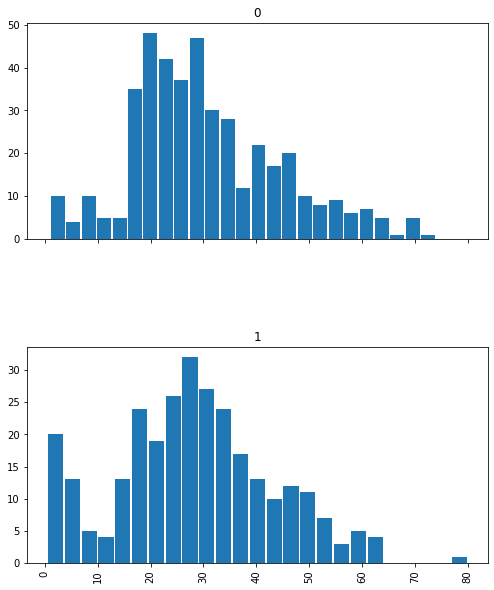

In [7]:
df.hist(column='Age', by='Survived', bins=25, figsize=(8,10), layout=(2,1), zorder=2, sharex=True, rwidth=0.9);

Clearly, pandas dataframes allows us to do advanced analysis with very few commands! But it takes a while to get used to how dataframes work so let us go back to basics.

## What is a dataframe?

![](img/01_table_dataframe.svg)

```{challenge}

Investigate the family size of the passengers, i.e. the "SibSp" column.

- What different family sizes exist in the passenger list? Hint: try the `unique` method 
- What are the names of the people in the largest family group?
- Create a histogram showing the distribution of family sizes 
```

In [13]:
df["SibSp"].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [65]:
df[df["SibSp"] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
